In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


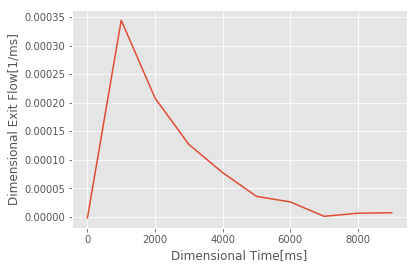

In [2]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [3]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [4]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [5]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\February\\'

time = 51200
time_n = 204800
Temp = np.array([1, 2, 3, 4, 5], dtype=float)
beta = 1/Temp
print(beta)
model = 0.1*np.arange(0, 11, dtype=float)
print(model)

[ 1.          0.5         0.33333333  0.25        0.2       ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [6]:
de0_one = ['zero', 'one', 'two', 'three', 'four']
de1_one = ['zero', 'one', 'two', 'three', 'four']
ka_one = ['zero', 'one', 'two', 'three', 'four']
kd_one = ['zero', 'one', 'two', 'three', 'four']
sigma_one = ['zero', 'one', 'two', 'three', 'four']
energy_one = ['zero', 'one', 'two', 'three', 'four']
dlogp_one = ['zero', 'one', 'two', 'three', 'four']
pick_one = ['zero', 'one', 'two', 'three', 'four']
update_one = ['zero', 'one', 'two', 'three', 'four']
exchange_one = ['zero', 'one', 'two', 'three', 'four']

de0_one_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_n = ['zero', 'one', 'two', 'three', 'four']
update_one_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_n = ['zero', 'one', 'two', 'three', 'four']

In [7]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one[i], de1_one[i], ka_one[i], kd_one[i], sigma_one[i], energy_one[i], dlogp_one[i], pick_one[i], \
    update_one[i], exchange_one[i] = file_output_one(r_file, time, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_n[i], de1_one_n[i], ka_one_n[i], kd_one_n[i], sigma_one_n[i], energy_one_n[i], dlogp_one_n[i], pick_one_n[i], \
    update_one_n[i], exchange_one_n[i] = file_output_one(r_file, time_n, model)

In [8]:
print(exchange_one)
print(exchange_one_n)

[array([  4646.,   4094.,   5219.,  12992.,  13208.,  14338.,  18695.,
        11635.,   3455.,   1441.]), array([  5839.,   6442.,   8819.,  10804.,  28787.,  26846.,  19018.,
        18447.,   4222.,   1532.]), array([  3927.,   6309.,   4548.,  11165.,  13635.,  13658.,  13994.,
        11230.,   4449.,   1664.]), array([  8057.,   7125.,  10463.,  11574.,  15216.,  15734.,  13683.,
        11586.,   6774.,   3322.]), array([  4148.,   4733.,  11271.,  14815.,  14350.,  16651.,  14131.,
         7505.,   2875.,   1597.])]
[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]


In [9]:
print(energy_one[0])
print(energy_one_n[0])

[[ 23080.57851245  13969.09287846  13969.09287846 ...,    -97.09372525
     -97.09372525    -97.09372525]
 [ 22659.12720247  21834.29594797  22654.66760338 ...,   -106.68273213
    -106.68273136   -106.68273136]
 [ 22243.69968097  22652.43282678  22195.65325119 ...,    -98.79092016
     -98.79092016    -98.65106015]
 ..., 
 [ 19877.63411034  20642.22747992  20997.58165688 ...,    -85.78916636
     -85.6684824     -85.77878207]
 [ 19504.37310829  12932.86596178  19876.15961792 ...,    -95.09299934
     -94.99825688    -94.81573361]
 [ 19137.13589473  19347.38242984  19347.38242984 ...,   -106.4467244
    -106.4467244    -106.36835347]]
[[ 23080.57851245  23080.57851245  23080.57851245 ...,    -74.77616059
     -74.77616059    -74.77616059]
 [ 22659.12720247  22658.96171973  22658.96171973 ...,   -106.38040981
    -106.42559205   -106.44165099]
 [ 22243.69968097  22237.11908065  22237.11908065 ...,   -101.4992554
    -101.51238724   -101.64579608]
 ..., 
 [ 19877.63411034  19877.63411034

C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))
C:\Users\anbaigashi\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\anbaigashi\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


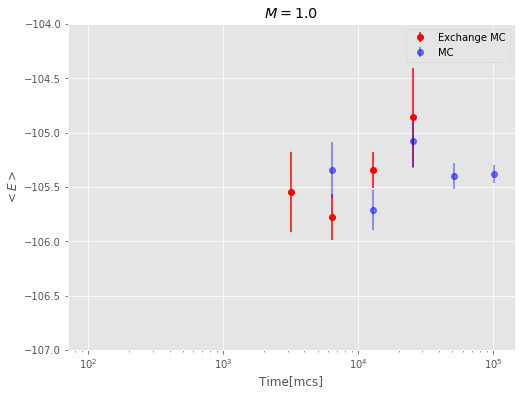

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 10

t_0 = 100
start = t_0
end = 2*start
while start<time_n:
    if start > 51200:
        pass
    else:
        bar_A_i = np.zeros(5, dtype=float)
        for i in range(5):
            bar_A_i[i] = energy_one[i][ondo][start:end].mean()
        bar_A = bar_A_i.mean()
    #    ax.scatter(start, bar_A, color='red')
    #    print(bar_A)

        sig = 0.
        for i in range(5):
            sig += (bar_A_i[i]-bar_A)**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])

    #    print(sig)

        if start==100:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red', label='Exchange MC')
        else:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    bar_A_n_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_n_i[i] = energy_one_n[i][ondo][start:end].mean()
    bar_A_n = bar_A_n_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig_n = 0.
    for i in range(5):
        sig_n += (bar_A_n_i[i]-bar_A_n)**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    
#    print(sig)
    
    if start == 100:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5, label='MC')
    else:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5)
    
    start = end
    end *= 2


ax.set_xlabel('Time[mcs]')
ax.set_ylabel('$<E>$')
ax.set_title('$M={}$'.format(ondo*0.1))
ax.set_ylim(-107, -104)
plt.legend()
plt.show()

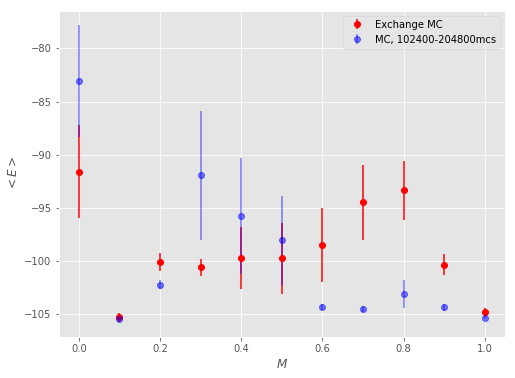

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(11, dtype=float)
energy_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_one[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
# energy_m_n_ = np.zeros(11, dtype=float)
# energy_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = energy_one_n[j][i][start:end].mean()
#     energy_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-energy_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     energy_s_n_[i] = sig_n

start = 102400
end = 2*start
energy_m_n = np.zeros(11, dtype=float)
energy_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = energy_one_n[j][i][start:end].mean()
    energy_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-energy_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    energy_s_n[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n, yerr=energy_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n_, yerr=energy_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


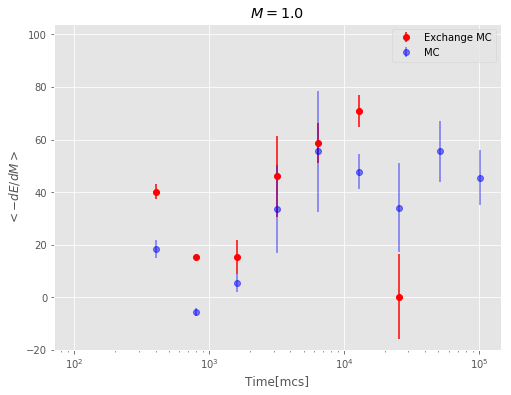

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 10

t_0 = 100
start = t_0
end = 2*start
while start<time_n:
    if start > 25600:
        pass
    else:
        bar_A_i = np.zeros(5, dtype=float)
        for i in range(5):
            bar_A_i[i] = dlogp_one[i][ondo][start:end].mean()
        bar_A = bar_A_i.mean()
    #    ax.scatter(start, bar_A, color='red')
    #    print(bar_A)

        sig = 0.
        for i in range(5):
            sig += (bar_A_i[i]-bar_A)**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])

    #    print(sig)

        if start==100:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red', label='Exchange MC')
        else:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    bar_A_n_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_n_i[i] = dlogp_one_n[i][ondo][start:end].mean()
    bar_A_n = bar_A_n_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig_n = 0.
    for i in range(5):
        sig_n += (bar_A_n_i[i]-bar_A_n)**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    
#    print(sig)
    
    if start == 100:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5, label='MC')
    else:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5)
    
    start = end
    end *= 2


ax.set_xlabel('Time[mcs]')
ax.set_ylabel('$<-dE/dM>$')
ax.set_title('$M={}$'.format(ondo*0.1))
ax.set_ylim(-20, 104)
plt.legend()
plt.show()

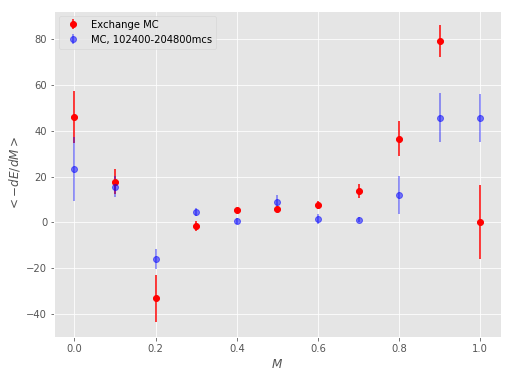

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

start = 102400
end = 2*start
dlogp_m_n = np.zeros(11, dtype=float)
dlogp_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = dlogp_one_n[j][i][start:end].mean()
    dlogp_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-dlogp_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    dlogp_s_n[i] = sig_n
    
start = 25600
end = 2*start
dlogp_m_n_ = np.zeros(11, dtype=float)
dlogp_s_n_ = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = dlogp_one_n[j][i][start:end].mean()
    dlogp_m_n_[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-dlogp_m_n_[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    dlogp_s_n_[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n, yerr=dlogp_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n_, yerr=dlogp_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

In [14]:
de0_one_2 = ['zero', 'one', 'two', 'three', 'four']
de1_one_2 = ['zero', 'one', 'two', 'three', 'four']
ka_one_2 = ['zero', 'one', 'two', 'three', 'four']
kd_one_2 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_2 = ['zero', 'one', 'two', 'three', 'four']
energy_one_2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_2 = ['zero', 'one', 'two', 'three', 'four']
pick_one_2 = ['zero', 'one', 'two', 'three', 'four']
update_one_2 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_2 = ['zero', 'one', 'two', 'three', 'four']

de0_one_2_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_2_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_2_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_2_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_2_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_2_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_2_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_2_n = ['zero', 'one', 'two', 'three', 'four']
update_one_2_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_2_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_5 = ['zero', 'one', 'two', 'three', 'four']
de1_one_5 = ['zero', 'one', 'two', 'three', 'four']
ka_one_5 = ['zero', 'one', 'two', 'three', 'four']
kd_one_5 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_5 = ['zero', 'one', 'two', 'three', 'four']
energy_one_5 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_5 = ['zero', 'one', 'two', 'three', 'four']
pick_one_5 = ['zero', 'one', 'two', 'three', 'four']
update_one_5 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_5 = ['zero', 'one', 'two', 'three', 'four']

de0_one_5_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_5_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_5_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_5_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_5_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_5_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_5_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_5_n = ['zero', 'one', 'two', 'three', 'four']
update_one_5_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_5_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_10 = ['zero', 'one', 'two', 'three', 'four']
de1_one_10 = ['zero', 'one', 'two', 'three', 'four']
ka_one_10 = ['zero', 'one', 'two', 'three', 'four']
kd_one_10 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_10 = ['zero', 'one', 'two', 'three', 'four']
energy_one_10 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_10 = ['zero', 'one', 'two', 'three', 'four']
pick_one_10 = ['zero', 'one', 'two', 'three', 'four']
update_one_10 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_10 = ['zero', 'one', 'two', 'three', 'four']

de0_one_10_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_10_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_10_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_10_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_10_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_10_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_10_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_10_n = ['zero', 'one', 'two', 'three', 'four']
update_one_10_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_10_n = ['zero', 'one', 'two', 'three', 'four']

In [97]:
for i in range(5):
    print(update_one_10[1].sum(axis=1)/51200)

[ 0.99123047  0.99152344  0.99052734  0.99109375  0.99095703  0.99023438
  0.99064453  0.98964844  0.98945313  0.98923828  0.98822266]
[ 0.99123047  0.99152344  0.99052734  0.99109375  0.99095703  0.99023438
  0.99064453  0.98964844  0.98945313  0.98923828  0.98822266]
[ 0.99123047  0.99152344  0.99052734  0.99109375  0.99095703  0.99023438
  0.99064453  0.98964844  0.98945313  0.98923828  0.98822266]
[ 0.99123047  0.99152344  0.99052734  0.99109375  0.99095703  0.99023438
  0.99064453  0.98964844  0.98945313  0.98923828  0.98822266]
[ 0.99123047  0.99152344  0.99052734  0.99109375  0.99095703  0.99023438
  0.99064453  0.98964844  0.98945313  0.98923828  0.98822266]


In [101]:
for i in range(5):
    print(update_one_2_n[1].sum(axis=1)/204800)

[ 0.90900879  0.8678418   0.92203613  0.97400879  0.87739746  0.88733398
  0.98087402  0.95215332  0.86143066  0.86352051  0.8873584 ]
[ 0.90900879  0.8678418   0.92203613  0.97400879  0.87739746  0.88733398
  0.98087402  0.95215332  0.86143066  0.86352051  0.8873584 ]
[ 0.90900879  0.8678418   0.92203613  0.97400879  0.87739746  0.88733398
  0.98087402  0.95215332  0.86143066  0.86352051  0.8873584 ]
[ 0.90900879  0.8678418   0.92203613  0.97400879  0.87739746  0.88733398
  0.98087402  0.95215332  0.86143066  0.86352051  0.8873584 ]
[ 0.90900879  0.8678418   0.92203613  0.97400879  0.87739746  0.88733398
  0.98087402  0.95215332  0.86143066  0.86352051  0.8873584 ]


In [15]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_Temp=2.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_2[i], de1_one_2[i], ka_one_2[i], kd_one_2[i], sigma_one_2[i], energy_one_2[i], dlogp_one_2[i], pick_one_2[i], \
    update_one_2[i], exchange_
one_2[i] = file_output_one(r_file, time, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma-koukannashi_datapoints=10_T=204800mcs_Temp=2.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_2_n[i], de1_one_2_n[i], ka_one_2_n[i], kd_one_2_n[i], sigma_one_2_n[i], energy_one_2_n[i], dlogp_one_2_n[i], pick_one_n[i], \
    update_one_2_n[i], exchange_one_2_n[i] = file_output_one(r_file, time_n, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_5[i], de1_one_5[i], ka_one_5[i], kd_one_5[i], sigma_one_5[i], energy_one_5[i], dlogp_one_5[i], pick_one_5[i], \
    update_one_5[i], exchange_one_5[i] = file_output_one(r_file, time, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma-koukannashi_datapoints=10_T=204800mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_5_n[i], de1_one_5_n[i], ka_one_5_n[i], kd_one_5_n[i], sigma_one_5_n[i], energy_one_5_n[i], dlogp_one_5_n[i], pick_one_n[i], \
    update_one_5_n[i], exchange_one_5_n[i] = file_output_one(r_file, time_n, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_10[i], de1_one_10[i], ka_one_10[i], kd_one_10[i], sigma_one_10[i], energy_one_10[i], dlogp_one_10[i], pick_one_10[i], \
    update_one_10[i], exchange_one_10[i] = file_output_one(r_file, time, model)
    
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma-koukannashi_datapoints=10_T=204800mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_10_n[i], de1_one_10_n[i], ka_one_10_n[i], kd_one_10_n[i], sigma_one_10_n[i], energy_one_10_n[i], dlogp_one_10_n[i], pick_one_10_n[i], \
    update_one_10_n[i], exchange_one_10_n[i] = file_output_one(r_file, time_n, model)

C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))
C:\Users\anbaigashi\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\anbaigashi\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


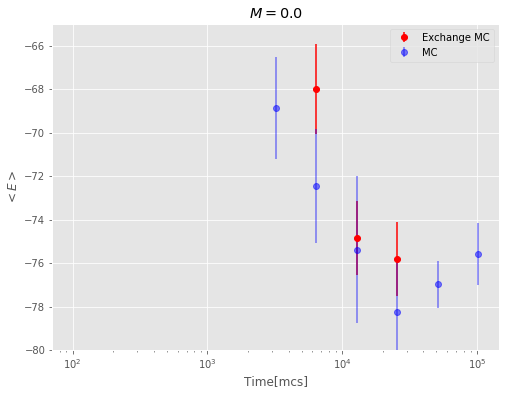

In [60]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 0

t_0 = 100
start = t_0
end = 2*start
while start<time_n:
    if start > 51200:
        pass
    else:
        bar_A_i = np.zeros(5, dtype=float)
        for i in range(5):
            bar_A_i[i] = energy_one_10[i][ondo][start:end].mean()
        bar_A = bar_A_i.mean()
    #    ax.scatter(start, bar_A, color='red')
    #    print(bar_A)

        sig = 0.
        for i in range(5):
            sig += (bar_A_i[i]-bar_A)**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])

    #    print(sig)

        if start==100:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red', label='Exchange MC')
        else:
            ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    bar_A_n_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_n_i[i] = energy_one_10_n[i][ondo][start:end].mean()
    bar_A_n = bar_A_n_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig_n = 0.
    for i in range(5):
        sig_n += (bar_A_n_i[i]-bar_A_n)**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    
#    print(sig)
    
    if start == 100:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5, label='MC')
    else:
        ax.errorbar(start, bar_A_n, yerr=sig_n, fmt='o', color='blue', alpha=0.5)
    
    start = end
    end *= 2


ax.set_xlabel('Time[mcs]')
ax.set_ylabel('$<E>$')
ax.set_title('$M={}$'.format(ondo*0.1))
ax.set_ylim(-80, -65)
plt.legend()
plt.show()

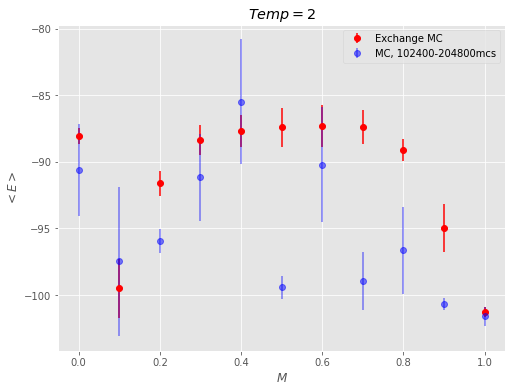

In [102]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(11, dtype=float)
energy_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_one_2[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
# energy_m_n_ = np.zeros(11, dtype=float)
# energy_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = energy_one_n[j][i][start:end].mean()
#     energy_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-energy_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     energy_s_n_[i] = sig_n

start = 102400
end = 2*start
energy_m_n = np.zeros(11, dtype=float)
energy_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = energy_one_2_n[j][i][start:end].mean()
    energy_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-energy_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    energy_s_n[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n, yerr=energy_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n_, yerr=energy_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
ax.set_title('$Temp=2$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

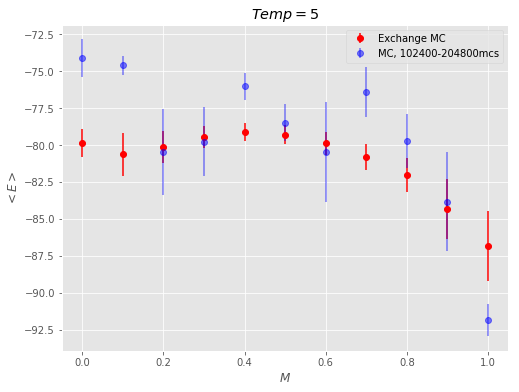

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(11, dtype=float)
energy_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_one_5[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
# energy_m_n_ = np.zeros(11, dtype=float)
# energy_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = energy_one_n[j][i][start:end].mean()
#     energy_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-energy_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     energy_s_n_[i] = sig_n

start = 102400
end = 2*start
energy_m_n = np.zeros(11, dtype=float)
energy_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = energy_one_5_n[j][i][start:end].mean()
    energy_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-energy_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    energy_s_n[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n, yerr=energy_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n_, yerr=energy_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
ax.set_title('$Temp=5$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

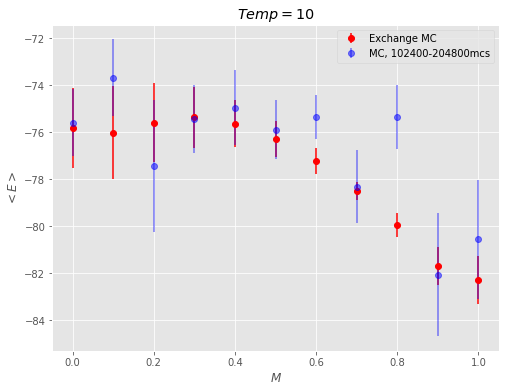

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(11, dtype=float)
energy_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_one_10[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    
# energy_m_n_ = np.zeros(11, dtype=float)
# energy_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = energy_one_n[j][i][start:end].mean()
#     energy_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-energy_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     energy_s_n_[i] = sig_n

start = 102400
end = 2*start
energy_m_n = np.zeros(11, dtype=float)
energy_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = energy_one_10_n[j][i][start:end].mean()
    energy_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-energy_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    energy_s_n[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n, yerr=energy_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), energy_m_n_, yerr=energy_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
ax.set_title('$Temp=10$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

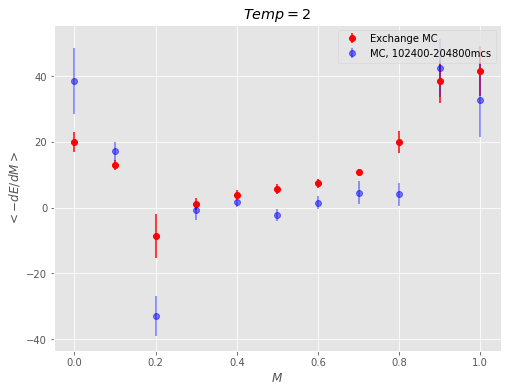

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one_2[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

start = 102400
end = 2*start
dlogp_m_n = np.zeros(11, dtype=float)
dlogp_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = dlogp_one_2_n[j][i][start:end].mean()
    dlogp_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-dlogp_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    dlogp_s_n[i] = sig_n
    
# start = 25600
# end = 2*start
# dlogp_m_n_ = np.zeros(11, dtype=float)
# dlogp_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = dlogp_one_n[j][i][start:end].mean()
#     dlogp_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-dlogp_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     dlogp_s_n_[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n, yerr=dlogp_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n_, yerr=dlogp_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
ax.set_title('$Temp=2$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

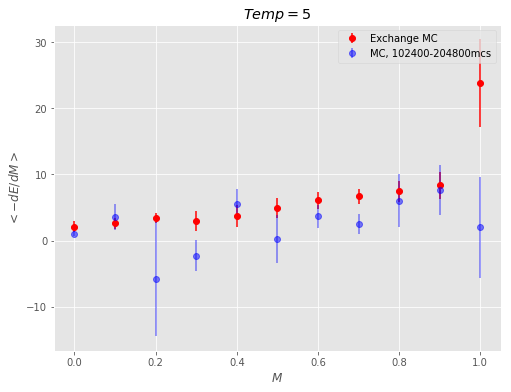

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one_5[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

start = 102400
end = 2*start
dlogp_m_n = np.zeros(11, dtype=float)
dlogp_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = dlogp_one_5_n[j][i][start:end].mean()
    dlogp_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-dlogp_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    dlogp_s_n[i] = sig_n
    
# start = 25600
# end = 2*start
# dlogp_m_n_ = np.zeros(11, dtype=float)
# dlogp_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = dlogp_one_n[j][i][start:end].mean()
#     dlogp_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-dlogp_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     dlogp_s_n_[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n, yerr=dlogp_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n_, yerr=dlogp_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
ax.set_title('$Temp=5$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

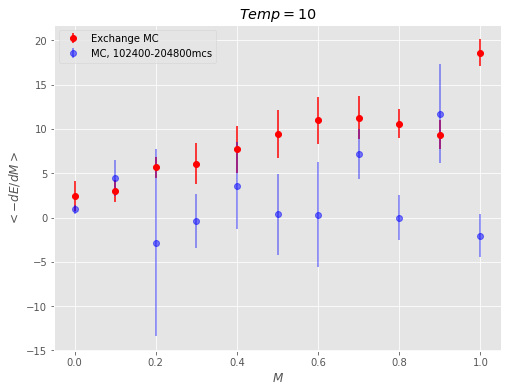

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one_10[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

start = 102400
end = 2*start
dlogp_m_n = np.zeros(11, dtype=float)
dlogp_s_n = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_n_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_n_i[j] = dlogp_one_10_n[j][i][start:end].mean()
    dlogp_m_n[i] = bar_A_n_i.mean()
    
    sig_n = 0.
    for j in range(5):
        sig_n += (bar_A_n_i[j]-dlogp_m_n[i])**2
    sig_n /= (bar_A_n_i.shape[0]-1)
    sig_n = np.sqrt(sig_n)
    sig_n /= np.sqrt(bar_A_n_i.shape[0])
    dlogp_s_n[i] = sig_n
    
# start = 25600
# end = 2*start
# dlogp_m_n_ = np.zeros(11, dtype=float)
# dlogp_s_n_ = np.zeros(11, dtype=float)

# for i in range(11):
#     bar_A_n_i = np.zeros(5, dtype=float)
#     for j in range(5):
#         bar_A_n_i[j] = dlogp_one_n[j][i][start:end].mean()
#     dlogp_m_n_[i] = bar_A_n_i.mean()
    
#     sig_n = 0.
#     for j in range(5):
#         sig_n += (bar_A_n_i[j]-dlogp_m_n_[i])**2
#     sig_n /= (bar_A_n_i.shape[0]-1)
#     sig_n = np.sqrt(sig_n)
#     sig_n /= np.sqrt(bar_A_n_i.shape[0])
#     dlogp_s_n_[i] = sig_n
    
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red', label='Exchange MC')
ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n, yerr=dlogp_s_n, fmt='o', color='blue', alpha=0.5, label='MC, 102400-204800mcs')
#ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m_n_, yerr=dlogp_s_n_, fmt='o', color='black', alpha=0.5, label='MC, 25600-51200mcs')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
ax.set_title('$Temp=10$')

plt.legend()
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

In [61]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\February\\'

time = 51200
Temp = np.array([1, 2, 3, 4, 5], dtype=float)
beta = 1/Temp
Temp2 = np.array([8, 16])
beta2 = 1/Temp2
print(beta)
print(beta2)

[ 1.          0.5         0.33333333  0.25        0.2       ]
[ 0.125   0.0625]


In [62]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

de0_two_2 = ['zero', 'one', 'two', 'three', 'four']
de1_two_2 = ['zero', 'one', 'two', 'three', 'four']
ka_two_2 = ['zero', 'one', 'two', 'three', 'four']
kd_two_2 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_2 = ['zero', 'one', 'two', 'three', 'four']
energy_two_2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_2 = ['zero', 'one', 'two', 'three', 'four']
pick_two_2 = ['zero', 'one', 'two', 'three', 'four']
update_two_2 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_2 = ['zero', 'one', 'two', 'three', 'four']

de0_two_3 = ['zero', 'one', 'two', 'three', 'four']
de1_two_3 = ['zero', 'one', 'two', 'three', 'four']
ka_two_3 = ['zero', 'one', 'two', 'three', 'four']
kd_two_3 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_3 = ['zero', 'one', 'two', 'three', 'four']
energy_two_3 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_3 = ['zero', 'one', 'two', 'three', 'four']
pick_two_3 = ['zero', 'one', 'two', 'three', 'four']
update_two_3 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_3 = ['zero', 'one', 'two', 'three', 'four']

de0_two_4 = ['zero', 'one', 'two', 'three', 'four']
de1_two_4 = ['zero', 'one', 'two', 'three', 'four']
ka_two_4 = ['zero', 'one', 'two', 'three', 'four']
kd_two_4 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_4 = ['zero', 'one', 'two', 'three', 'four']
energy_two_4 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_4 = ['zero', 'one', 'two', 'three', 'four']
pick_two_4 = ['zero', 'one', 'two', 'three', 'four']
update_two_4 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_4 = ['zero', 'one', 'two', 'three', 'four']

de0_two_5 = ['zero', 'one', 'two', 'three', 'four']
de1_two_5 = ['zero', 'one', 'two', 'three', 'four']
ka_two_5 = ['zero', 'one', 'two', 'three', 'four']
kd_two_5 = ['zero', 'one', 'two', 'three', 'four']
sigma_two_5 = ['zero', 'one', 'two', 'three', 'four']
energy_two_5 = ['zero', 'one', 'two', 'three', 'four']
dlogp_two_5 = ['zero', 'one', 'two', 'three', 'four']
pick_two_5 = ['zero', 'one', 'two', 'three', 'four']
update_two_5 = ['zero', 'one', 'two', 'three', 'four']
exchange_two_5 = ['zero', 'one', 'two', 'three', 'four']

In [63]:
for i in range(5):
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=51200mcs_Temp=1-5_replica=5_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp_two[i], pick_two[i], \
    update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))
    
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=51200mcs_Temp=8-16_replica=2_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_2[i], de1_two_2[i], ka_two_2[i], kd_two_2[i], sigma_two_2[i], energy_two_2[i], dlogp_two_2[i], pick_two_2[i], \
    update_two_2[i], exchange_two_2[i] = file_output_two(r_file, time, np.hstack((Temp2, Temp2)))
    
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=51200mcs_Temp=32-64_replica=2_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_3[i], de1_two_3[i], ka_two_3[i], kd_two_3[i], sigma_two_3[i], energy_two_3[i], dlogp_two_3[i], pick_two_3[i], \
    update_two_3[i], exchange_two_3[i] = file_output_two(r_file, time, np.hstack((Temp2, Temp2)))
    
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=51200mcs_Temp=128-256_replica=2_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_4[i], de1_two_4[i], ka_two_4[i], kd_two_4[i], sigma_two_4[i], energy_two_4[i], dlogp_two_4[i], pick_two_4[i], \
    update_two_4[i], exchange_two_4[i] = file_output_two(r_file, time, np.hstack((Temp2, Temp2)))
    
    r_file = read_file_pass + 'EMbeta_TAP-sigma_datapoints=10_T=51200mcs_Temp=512-1024_replica=2_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two_5[i], de1_two_5[i], ka_two_5[i], kd_two_5[i], sigma_two_5[i], energy_two_5[i], dlogp_two_5[i], pick_two_5[i], \
    update_two_5[i], exchange_two_5[i] = file_output_two(r_file, time, np.hstack((Temp2, Temp2)))

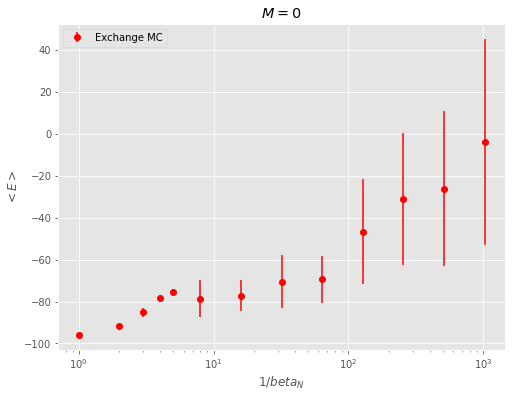

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(13, dtype=float)
energy_s = np.zeros(13, dtype=float)

t = 0
for i in range(5):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    t = i
    
for i in range(2):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_2[j][i][start:end].mean()
    energy_m[t+1+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+1+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_3[j][i][start:end].mean()
    energy_m[t+3+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+3+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_4[j][i][start:end].mean()
    energy_m[t+5+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+5+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_5[j][i][start:end].mean()
    energy_m[t+7+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+7+i] = sig
    
 
ax.errorbar(np.hstack(((np.arange(1, 6), np.array([8, 16, 32, 64, 128, 256, 512, 1024])))),
            energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.set_xlabel('$1/beta_N$')
ax.set_ylabel('$<E>$')
ax.set_title('$M=0$')
ax.set_xscale('log')

plt.legend(loc='upper left')
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

In [72]:
print(np.hstack((np.arange(1, 6), np.array([8, 16]))))

[ 1  2  3  4  5  8 16]


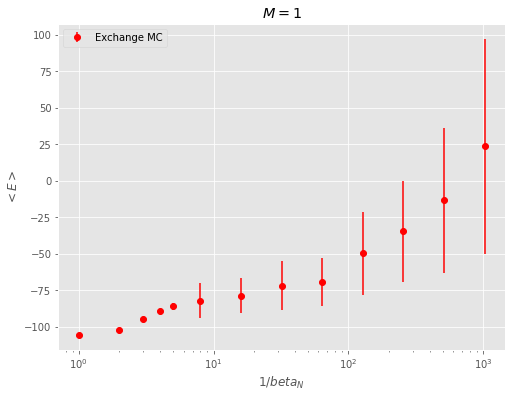

In [90]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(13, dtype=float)
energy_s = np.zeros(13, dtype=float)

t = 0
for i in range(5):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][9-i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig
    t = i
    
for i in range(2):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_2[j][3-i][start:end].mean()
    energy_m[t+1+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+1+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_3[j][3-i][start:end].mean()
    energy_m[t+3+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+3+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_4[j][3-i][start:end].mean()
    energy_m[t+5+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+5+i] = sig
    
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two_5[j][3-i][start:end].mean()
    energy_m[t+7+i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[t+7+i] = sig
    
 
ax.errorbar(np.hstack(((np.arange(1, 6), np.array([8, 16, 32, 64, 128, 256, 512, 1024])))),
            energy_m, yerr=energy_s, fmt='o', color='red', label='Exchange MC')
ax.set_xlabel('$1/beta_N$')
ax.set_ylabel('$<E>$')
ax.set_title('$M=1$')
ax.set_xscale('log')

plt.legend(loc='upper left')
#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

In [91]:
print(energy_m)
print(energy_s)

[-105.3978139  -101.8698679   -94.81646792  -89.37109747  -85.72226415
  -81.99906699  -78.52338338  -71.86106453  -69.17516511  -49.52105482
  -34.45113844  -13.1968455    23.59052846]
[  0.11529356   0.18441223   1.48442232   2.03085179   2.4181459
  12.03848561  11.7510566   16.78431555  16.38807777  28.31248007
  34.47116052  49.71044558  73.7828263 ]
